# Projeto 02

 Passo a passo do problema
- Buscar as informações das ações automatiamente
- Criar a análises solicitadas
    - cotação máxima
    - cotação mínima
    valor médio das ações
- Enviar um e-mail para o gestor 

#### * Buscando os dados das ações automaticamente

Bibliotecas: yfinance e matplotlib

pip install yfinance  pip install matplotlib

In [2]:
import yfinance


In [3]:
# agora vamos buscar os dados no site desejado, no caso o Yahoo Finance
yfinance.Ticker("PETR4.SA")
# o código ("PETR4.SA") se consegue dentro do site do Yahoo Finance onde cada empresa tem seu próprio códio. Abaixo yfinance.Ticker object <PETR4.SA> a confirmação de que o sistema já está em contato com a base de dados do Yahoo e nas ações da PETROBRAS.

yfinance.Ticker object <PETR4.SA>

In [4]:

# Agora vamos passar o período em que desejamos essas análises, onde start é o início e end o final do período
dados = yfinance.Ticker("PETR4.SA").history(start="2020-01-01", end="2020-12-31")
dados

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-03:00,10.856116,10.923722,10.784951,10.923722,37774500,0.0,0.0
2020-01-03 00:00:00-03:00,10.987769,11.115865,10.834766,10.834766,71595600,0.0,0.0
2020-01-06 00:00:00-03:00,10.827650,11.009119,10.656856,10.962862,81844000,0.0,0.0
2020-01-07 00:00:00-03:00,10.966421,10.987770,10.841883,10.920164,32822000,0.0,0.0
2020-01-08 00:00:00-03:00,10.920165,10.948631,10.760045,10.852559,48215600,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-22 00:00:00-03:00,9.678541,9.774614,9.625166,9.707007,46513200,0.0,0.0
2020-12-23 00:00:00-03:00,9.760381,10.052160,9.731914,9.945412,49038900,0.0,0.0
2020-12-28 00:00:00-03:00,10.091301,10.148233,10.027251,10.027251,36313300,0.0,0.0


In [6]:

# como vamos trabalhar apenas com dados de fechamento destes dados nesse período, não é necessário que fique com toda essa tabela, porém ela permaneceu para efeito didático. Com o código abaixo vamos extarir apenas o período que é pedido pelo projeto, ou seja, fechamento.
dados = yfinance.Ticker("PETR4.SA").history(start="2020-01-01", end="2020-12-31")
fechamento = dados.Close
fechamento

Date
2020-01-02 00:00:00-03:00    10.923722
2020-01-03 00:00:00-03:00    10.834766
2020-01-06 00:00:00-03:00    10.962862
2020-01-07 00:00:00-03:00    10.920164
2020-01-08 00:00:00-03:00    10.852559
                               ...    
2020-12-22 00:00:00-03:00     9.707007
2020-12-23 00:00:00-03:00     9.945412
2020-12-28 00:00:00-03:00    10.027251
2020-12-29 00:00:00-03:00    10.059277
2020-12-30 00:00:00-03:00    10.084184
Name: Close, Length: 248, dtype: float64

##### Se desejassemos expor esses dados em um gráfico, faríamos da seguinte forma, utilizando o metplotlib

<Axes: xlabel='Date'>

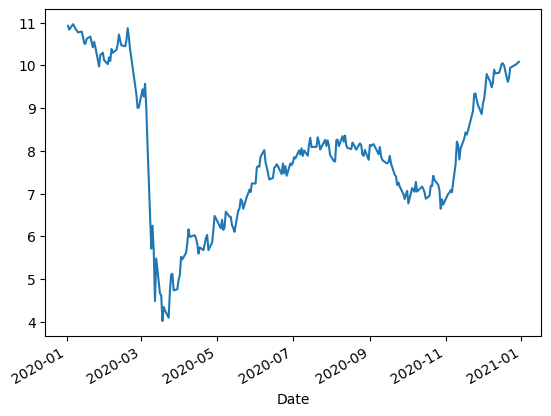

In [41]:
ticker = input("Digite o código da ação desejada: ")

dados = yfinance.Ticker("PETR4.SA").history(start="2020-01-01", end="2020-12-31")
fechamento = dados.Close
fechamento.plot()

#### * Criando as análises solicitadas

- Cotação máxima

In [9]:
fechamento.max()

np.float64(10.962862014770508)

- Cotação mínima

In [10]:
fechamento.min()

np.float64(4.01722526550293)

- Cotação média

In [11]:
fechamento.mean()

np.float64(7.9362116994396334)

In [12]:
maxima = fechamento.max()
minima = fechamento.min()
valor_medio = fechamento.mean()

print(maxima)
print(minima)
print(valor_medio)

10.962862014770508
4.01722526550293
7.9362116994396334


###### Vamos configurar esses números para que tenham uma melhor apresentação, visto que serão enviados por e-mail

In [13]:
maxima = round(fechamento.max(),2)
minima = round(fechamento.min(),2)
valor_medio = round(fechamento.mean(),2)

print(maxima)
print(minima)
print(valor_medio)

10.96
4.02
7.94


##### * Enviar o e-mail automaticamente
     -- Passo a passo de como se envia um e-mail na forma tradicional
- abrir o navegador e ir ao e-mail (seja ele qual for)
- clicar no botão escrever
- digitar o e-mail do destinátario e teclar TAB(para ir a próxima linha)
- digitar o asssunto e teclar TAB
- digitar a mensagem
- clicar no Enviar

Para fazer essa automação (ROBOZINHO) vamos utilizar de uma biblioteca chamada -> pyautogui  que em seu complemento vai trazer as seguintes bibliotecas:
pyperclip, webbrowser

pip install pyautogui

##### Bibliotecas

In [47]:
import pyautogui
import pyperclip
import webbrowser
import time

# Configurando as informações de envio
destinatario = "feralana1104756@gmail.com"
assunto = "Análises do Projeto 2020"

mensagem = f""" 
Prezado gestor,

Seguem as análises solicitadas da ação {ticker}:

Cotação máxima: R$ {maxima}
Cotação mínima: R$ {minima}
Valor médio:    R$ {valor_medio}

Qualquer dúvida, estou á disposição!

Atte.
"""

# abrir o navegador e ir ao e-mail desejado
webbrowser.open("www.gmail.com")

# abaixo vamos colocar um time para que o PYTHON ajuste o tempo de carregamento do e-mail, essa função irá auxiliar nas próximas configurações do projeto
time.sleep(4)

# Para não correr o riso do pyautogui sair disparado escrevendo desorientadamente devemos adicionar a ele um comando de pausa para que se execute com calma
pyautogui.PAUSE = 3

# Para clicar no botão escrever,o ponteiro do mouse tem uma coordenada no eixo X e eixo Y, esses pontos que determinarão a coordenada a ser clicada
# Para descobrir essas coordenadas, PRIMEIRO vamos utilizamos o comando pyautogui.position() e onde o mouse for parado será a coordenada a ser adicionada
# Então ao abrir na sequência o e-mail, já apontamos o mouse para o local onde está o botão escrever e teremos a coordenada do botão "escrever"
pyautogui.click(x=74, y=213)

# digitar o e-mail do destinátario e teclar TAB -> copia o e-mail de destino, cola o e-mail de destino e da o TAB
pyperclip.copy(destinatario)
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# digitar o assunto do e-mail
pyperclip.copy(assunto)
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# digitar a mensagem do e-mail
pyperclip.copy(mensagem)
pyautogui.hotkey("ctrl", "v")

# clicar no botão enviar
pyautogui.click(x=1303, y=991)


In [45]:
time.sleep(5)
pyautogui.position()

Point(x=1303, y=991)